In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [172]:
# Sigmoid Function
def sig(w,x):
    d=np.dot(x,w)
    t_pred = 1/(1+np.exp(-d))
    return t_pred

# Log Likelihood
def loglikelihood(w,x,t):
    l=0
    for i in range(len(t)):
        l += t[i]*np.log(sig(w,x[i,:]))+(1-t[i])*np.log(1-sig(w,x[i,:]))
    return l

# Derivative of the Loss Function
def dLdW(w,x,t):
    t_pred = sig(w,x)
    return (t_pred-t)*x

In [184]:
# Read datasets and make normalized version
dataset = pd.read_csv('diabetes.csv')
scaler = MinMaxScaler()
scaler.fit(dataset)
scaler.data_max_
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
normalized_dataset = pd.DataFrame(scaler.transform(dataset), columns=column_names)

# Split Unnormalized Data
X = dataset.drop('Outcome', axis=1)
t = dataset['Outcome']
train_X, test_X, train_t, test_t = train_test_split(X, t, test_size=0.2, stratify=t)
del dataset, X, t
column_names = ['Bias', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
train_X = pd.DataFrame(np.concatenate((np.ones(train_X.shape[0]).reshape(-1,1), train_X.values), axis=1),columns = column_names)
train_t = pd.DataFrame(train_t.values,columns = ['Outcome'])
test_X = pd.DataFrame(np.concatenate((np.ones(test_X.shape[0]).reshape(-1,1), test_X.values), axis=1),columns = column_names)
test_t = pd.DataFrame(test_t.values,columns = ['Outcome'])

train_X = train_X.values
train_t = train_t.values
test_X = test_X.values
test_t = test_t.values

l = train_X.shape[0]
X = np.concatenate((train_X,test_X), axis=0)
scaler.fit(X)
scaler.data_max_
X = scaler.transform(X)
norm_train_X = X[0:l,:]
norm_test_X = X[l:,:]
norm_train_t = train_t
norm_test_t = test_t

# # Split Normalized Data
# X = normalized_dataset.drop('Outcome', axis=1)
# t = normalized_dataset['Outcome']
# norm_train_X, norm_test_X, norm_train_t, norm_test_t = train_test_split(X, t, test_size=0.2, stratify=t)
# del normalized_dataset, X, t
# norm_train_X = pd.DataFrame(norm_train_X.values,columns = column_names)
# norm_train_t = pd.DataFrame(norm_train_t.values,columns = ['Outcome'])
# norm_test_X = pd.DataFrame(norm_test_X.values,columns = column_names)
# norm_test_t = pd.DataFrame(norm_test_t.values,columns = ['Outcome'])

# Problem 2
Implement stochastic gradient descent for logistic regression (see equation 4.91, but update for each example in turn rather than summing the gradients over all examples) and do the following:

## 2.a.
Apply your SGD algorithm to the un-normalized training set. Keep track of the log-likelihood of the training set, and run until the log-likelihood seems to be converging. Experiment a little bit with the step-size. What step sizes seem to lead to faster convergence? How long does the convergence take (measured in wall-clock time and epochs). What is your error rates and average log-likelihood on the training data and on the test data? (The average log-likelihood divided by the number of examples.) What features are given the highest positive weights? Which features are given the largest negative weights?

Epochs: 81
Runtime: 1.8657011985778809
Log Likelihood of Training Data: [-0.78932254]
Log Likelihood of Test Set: [-0.21763364]
Predicted Training Labels: [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 1 0

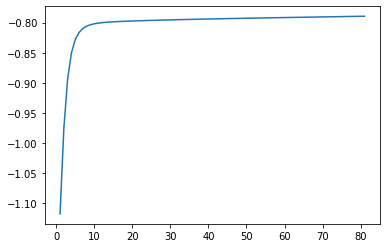

In [206]:
# Initialize weights and Likelihood values
w = np.random.random(train_X.shape[1])
likelihood = np.array([])
ind = np.array([])

# Stochastic Gradient Descent
threshold = 1e-4
nsteps = train_t.shape[0]
alpha = 1e-4
l_old = -np.inf
l_new = -np.random.random(1)
start = time.time()
epochs = 0
while (abs(l_old - l_new) > threshold) or (np.isnan(l_old) or np.isnan(l_new)):
    for i in range(nsteps):
        w = w - alpha * dLdW(w.reshape(-1), train_X[i,:], train_t[i])
    epochs += 1
    ind = np.append(ind,epochs)
    l_old = l_new
    l_new = loglikelihood(w.reshape(-1),train_X,train_t)/nsteps
    likelihood = np.append(likelihood,l_new)
end = time.time()
runtime = end-start
pred_train_t = (sig(w.reshape(-1),train_X) > 0.5).astype(int)
pred_test_t = (sig(w.reshape(-1),test_X) > 0.5).astype(int)
plt.plot(ind,likelihood,'-')
print('Epochs:', epochs)
print('Runtime:', runtime)
print('Log Likelihood of Training Data:', loglikelihood(w.reshape(-1), train_X, train_t)/nsteps)
print('Log Likelihood of Test Set:', loglikelihood(w.reshape(-1), test_X, test_t)/nsteps)
print('Predicted Training Labels:', pred_train_t)
print('Predicted Test Labels:', pred_test_t)
print('Error on Training Data:', mean_squared_error(train_t, pred_train_t))
print('Error on Test Data:', mean_squared_error(test_t, pred_test_t))
w = pd.DataFrame(w.reshape(1,-1),columns = column_names)


del likelihood, ind, threshold, nsteps, alpha, epochs, l_old, l_new, i, pred_train_t, pred_test_t

In [207]:
# Print the weights
w.head()

,Bias,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.153285,0.247829,0.028142,-0.044244,0.013437,-0.013147,-0.008274,0.240614,-0.041585


## 2.b.
Apply your SGD algorithm to the normalized training set. You can use a good step-size from the previous part. Report the log-likelihoods and error rates on the training and test sets. Are the learned weights similar? Are the learned hypotheses similar after taking into account the rescaling?

[-0.6564888] [-0.65638953]
Runtime: 4.080625295639038
Epochs: 169
Log Likelihood of Training Data: [-0.65638953]
Log Likelihood of Test Set: [-0.16594318]
Predicted Training Labels: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0

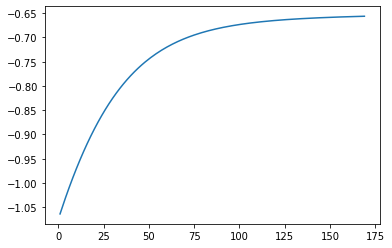

In [208]:
# Initialize weights and Likelihood values
w = np.random.random(norm_train_X.shape[1])
likelihood = np.array([])
ind = np.array([])

# Stochastic Gradient Descent
threshold = 1e-4
nsteps = norm_train_t.shape[0]
alpha = 1e-4
epochs = 0
l_old = -np.inf
l_new = -np.random.random(1)
start = time.time()
# for e in range(200):
while (abs(l_old - l_new) > threshold) or (np.isnan(l_old) or np.isnan(l_new)):
    for i in range(nsteps):
        w = w - alpha * dLdW(w.reshape(-1), norm_train_X[i,:], norm_train_t[i])
    epochs += 1
    ind = np.append(ind,epochs)
    l_old = l_new
    l_new = loglikelihood(w.reshape(-1),norm_train_X,norm_train_t)/nsteps
    likelihood = np.append(likelihood,l_new)
end = time.time()
print(l_old, l_new)
print('Runtime:', end-start)
pred_train_t = (sig(w.reshape(-1),norm_train_X) > 0.5).astype(int)
pred_test_t = (sig(w.reshape(-1),norm_test_X) > 0.5).astype(int)
plt.plot(ind,likelihood,'-')
print('Epochs:', epochs)
print('Log Likelihood of Training Data:', loglikelihood(w.reshape(-1), norm_train_X, norm_train_t)/nsteps)
print('Log Likelihood of Test Set:', loglikelihood(w.reshape(-1), norm_test_X, norm_test_t)/nsteps)
print('Predicted Training Labels:', pred_train_t)
print('Predicted Test Labels:', pred_test_t)
print('Error on Training Data:', mean_squared_error(norm_train_t, pred_train_t))
print('Error on Test Data:', mean_squared_error(norm_test_t, pred_test_t))
w = pd.DataFrame(w.reshape(1,-1),columns = column_names)


del likelihood, ind, threshold, nsteps, alpha, epochs, l_old, l_new, i, pred_train_t, pred_test_t

In [209]:
w.head()

,Bias,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.243043,0.030812,-0.496254,-0.595068,0.460866,0.50018,-0.017277,0.282937,0.550184


# Problem 3
First apply a decision tress classifier (we recommend the one with scikit learn) on the training set. Experiment with different maximum depths, and report their error rates on the training and test data. Also report the training times required. Should the training or test set accuracies be the same on the unnormalized data as the normalized data? Why or why not? Next, apply a random forrest learner  to the training data. Try a few different numbers of trees (perhaps 5, 20, and 100). Report the training and test accuracies of your forests.

In [210]:
# Read datasets and make normalized version
dataset = pd.read_csv('diabetes.csv')

# Split Unnormalized Data
X = dataset.drop('Outcome', axis=1)
t = dataset['Outcome']
train_X, test_X, train_t, test_t = train_test_split(X, t, test_size=0.2, stratify=t)
del dataset, X, t
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
train_X = pd.DataFrame(train_X.values,columns = column_names)
train_t = pd.DataFrame(train_t.values,columns = ['Outcome'])
test_X = pd.DataFrame(test_X.values,columns = column_names)
test_t = pd.DataFrame(test_t.values,columns = ['Outcome'])

train_X = train_X.values
train_t = train_t.values
test_X = test_X.values
test_t = test_t.values

l = train_X.shape[0]
X = np.concatenate((train_X,test_X), axis=0)
scaler.fit(X)
scaler.data_max_
X = scaler.transform(X)
norm_train_X = X[0:l,:]
norm_test_X = X[l:,:]
norm_train_t = train_t
norm_test_t = test_t

# # Split Normalized Data
# X = normalized_dataset.drop('Outcome', axis=1)
# t = normalized_dataset['Outcome']
# norm_train_X, norm_test_X, norm_train_t, norm_test_t = train_test_split(X, t, test_size=0.2, stratify=t)
# del normalized_dataset, X, t
# norm_train_X = pd.DataFrame(norm_train_X.values,columns = column_names)
# norm_train_t = pd.DataFrame(norm_train_t.values,columns = ['Outcome'])
# norm_test_X = pd.DataFrame(norm_test_X.values,columns = column_names)
# norm_test_t = pd.DataFrame(norm_test_t.values,columns = ['Outcome'])

In [255]:
# Unnormalized Data Sets
for i in range(4,20,5):
    start = time.time()
    tree = DecisionTreeClassifier(max_depth=i+1)
    tree.fit(train_X, train_t)
    end = time.time()
    pred_train_t = tree.predict(train_X)
    pred_test_t = tree.predict(test_X)
    print("Max Depth:", i+1)
    print("Training Time:", end-start)
    print("Training Error:", mean_squared_error(train_t, pred_train_t))
    print("Test Error:", mean_squared_error(test_t, pred_test_t))

Max Depth: 5
Training Time: 0.00821828842163086
Training Error: 0.1482084690553746
Test Error: 0.2532467532467532
Max Depth: 10
Training Time: 0.010079383850097656
Training Error: 0.014657980456026058
Test Error: 0.3051948051948052
Max Depth: 15
Training Time: 0.008715391159057617
Training Error: 0.0
Test Error: 0.3051948051948052
Max Depth: 20
Training Time: 0.009923934936523438
Training Error: 0.0
Test Error: 0.2792207792207792


In [256]:
# Normalized Data Sets
for i in range(4,20,5):
    start = time.time()
    tree = DecisionTreeClassifier(max_depth=i+1)
    tree.fit(norm_train_X, norm_train_t)
    end = time.time()
    pred_train_t = tree.predict(norm_train_X)
    pred_test_t = tree.predict(norm_test_X)
    print("Max Depth:", i+1)
    print("Training Time:", end-start)
    print("Training Error:", mean_squared_error(norm_train_t, pred_train_t))
    print("Test Error:", mean_squared_error(norm_test_t, pred_test_t))

Max Depth: 5
Training Time: 0.008011341094970703
Training Error: 0.1482084690553746
Test Error: 0.24025974025974026
Max Depth: 10
Training Time: 0.010040044784545898
Training Error: 0.014657980456026058
Test Error: 0.2792207792207792
Max Depth: 15
Training Time: 0.009317874908447266
Training Error: 0.0
Test Error: 0.3051948051948052
Max Depth: 20
Training Time: 0.009448528289794922
Training Error: 0.0
Test Error: 0.2857142857142857


In [271]:
ntrees = [5, 20, 100]

for n in ntrees:
    start = time.time()
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(train_X, train_t.reshape(-1))
    end = time.time()
    pred_train_t = forest.predict(train_X)
    pred_test_t = forest.predict(test_X)
    print("Number of Trees:", n)
    print("Training Time:", end-start)
    print("Training Error:", mean_squared_error(train_t, pred_train_t))
    print("Test Error:", mean_squared_error(test_t, pred_test_t))

Number of Trees: 5
Training Time: 0.037393808364868164
Training Error: 0.03745928338762215
Test Error: 0.2922077922077922
Number of Trees: 20
Training Time: 0.09646320343017578
Training Error: 0.009771986970684038
Test Error: 0.23376623376623376
Number of Trees: 100
Training Time: 0.2305753231048584
Training Error: 0.0
Test Error: 0.22077922077922077


In [272]:
for n in ntrees:
    start = time.time()
    forest = RandomForestClassifier(n_estimators=5)
    forest.fit(norm_train_X, norm_train_t.reshape(-1))
    end = time.time()
    pred_train_t = forest.predict(norm_train_X)
    pred_test_t = forest.predict(norm_test_X)
    print("Number of Trees:", n)
    print("Training Time:", end-start)
    print("Training Error:", mean_squared_error(norm_train_t, pred_train_t))
    print("Test Error:", mean_squared_error(norm_test_t, pred_test_t))

Number of Trees: 5
Training Time: 0.014598369598388672
Training Error: 0.03257328990228013
Test Error: 0.2662337662337662
Number of Trees: 20
Training Time: 0.012556076049804688
Training Error: 0.03257328990228013
Test Error: 0.2987012987012987
Number of Trees: 100
Training Time: 0.011200189590454102
Training Error: 0.03257328990228013
Test Error: 0.22077922077922077


# Problem 4
Scikit learn has a neural_network.MLPClassifier module, use that or something similar to train up a neural network on your normalized training set. Experiment a bit with the number of layers (say 1-4) and number of nodes on each layer (say 10 to 100). Report the training time and accuracies on the training set and test set. Neural network packages tend to have many tunable parameters. Explore the effects for them on the running time and goodness of the produced hypothesis. Some of the more interesting candidates for exploration might be momentum, solver, and alpha (the L2 penalty parameter).

In [372]:
avg_runtime = np.array([])
avg_train_accuracy = np.array([])
avg_test_accuracy = np.array([])
for i in range(100):
    start = time.time()
    nn = MLPClassifier(hidden_layer_sizes=(100,4), max_iter=2000)
    nn.fit(norm_train_X, norm_train_t.reshape(-1))
    end = time.time()
    avg_runtime = np.append(avg_runtime, end-start)
    pred_train_t = nn.predict(norm_train_X)
    pred_test_t = nn.predict(norm_test_X)
    avg_train_accuracy = np.append(avg_train_accuracy, 1-mean_squared_error(norm_train_t, pred_train_t))
    avg_test_accuracy = np.append(avg_test_accuracy, 1-mean_squared_error(norm_test_t, pred_test_t))

print("Average Training Time:", sum(avg_runtime)/100)
print("Average Training Accuracy:", sum(avg_train_accuracy)/100)
print("Average Test Accuracy:", sum(avg_test_accuracy)/100)

Average Training Time: 2.4983204555511476
Average Training Accuracy: 0.7212540716612369
Average Test Accuracy: 0.7068831168831174


In [ ]:
start = time.time()
nn = MLPClassifier(hidden_layer_sizes=(100,4), max_iter=2000)
nn.fit(norm_train_X, norm_train_t.reshape(-1))
end = time.time()
avg_runtime = np.append(avg_runtime, end-start)
pred_train_t = nn.predict(norm_train_X)
pred_test_t = nn.predict(norm_test_X)
avg_train_accuracy = np.append(avg_train_accuracy, 1-mean_squared_error(norm_train_t, pred_train_t))
avg_test_accuracy = np.append(avg_test_accuracy, 1-mean_squared_error(norm_test_t, pred_test_t))
